In [2]:
#NB!!! last model is the one used in the final result, it provides a keras file

2024-05-03 21:50:43.417388: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 21:50:43.417440: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 21:50:43.417497: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-03 21:50:43.427739: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Currently logged in as: oskar

Found 5121 images belonging to 4 classes.
Found 1291 images belonging to 4 classes.


2024-05-03 21:50:49.239839: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 128)       0

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
320/320 [==============================] - ETA: 0s - loss: 0.9763 - accuracy: 0.5497

/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240503_215048-1ua9bb2b/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240503_215048-1ua9bb2b/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240503_215048-1ua9bb2b/files/model-best)... Done. 3.2s



Epoch 1: val_accuracy improved from -inf to 0.59453, saving model to model_best_custom_cnn.h5


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


320/320 [==============================] - 282s 877ms/step - loss: 0.9763 - accuracy: 0.5497 - val_loss: 0.9630 - val_accuracy: 0.5945
Epoch 2/100
320/320 [==============================] - ETA: 0s - loss: 0.4223 - accuracy: 0.8366
Epoch 2: val_accuracy did not improve from 0.59453
320/320 [==============================] - 264s 825ms/step - loss: 0.4223 - accuracy: 0.8366 - val_loss: 1.3005 - val_accuracy: 0.4930
Epoch 3/100
320/320 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9745
Epoch 3: val_accuracy improved from 0.59453 to 0.61484, saving model to model_best_custom_cnn.h5
320/320 [==============================] - 266s 830ms/step - loss: 0.0728 - accuracy: 0.9745 - val_loss: 1.5841 - val_accuracy: 0.6148
Epoch 4/100
320/320 [==============================] - ETA: 0s - loss: 0.0328 - accuracy: 0.9900
Epoch 4: val_accuracy improved from 0.61484 to 0.62969, saving model to model_best_custom_cnn.h5
320/320 [==============================] - 265s 830ms/step 

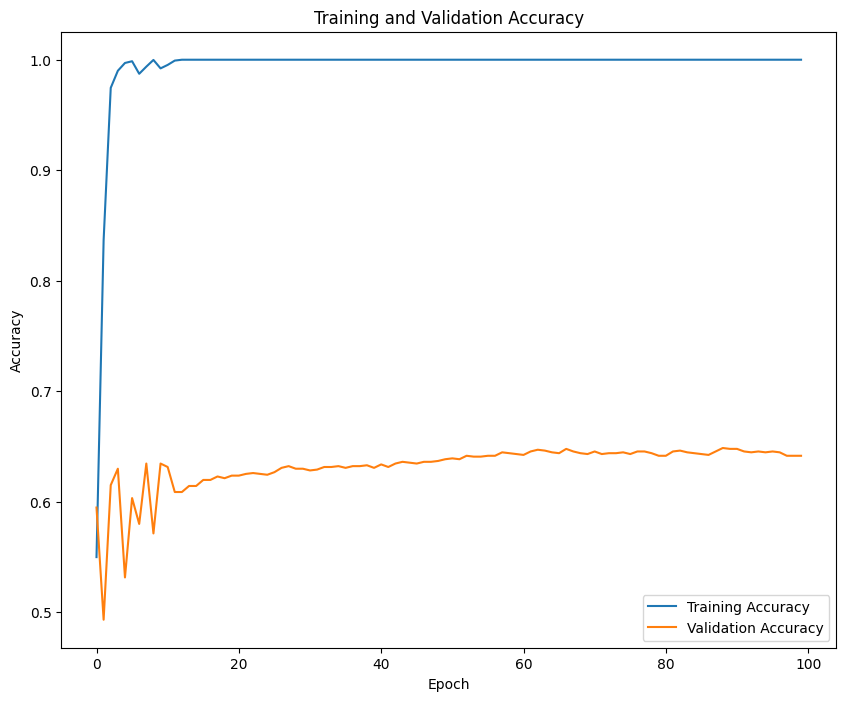

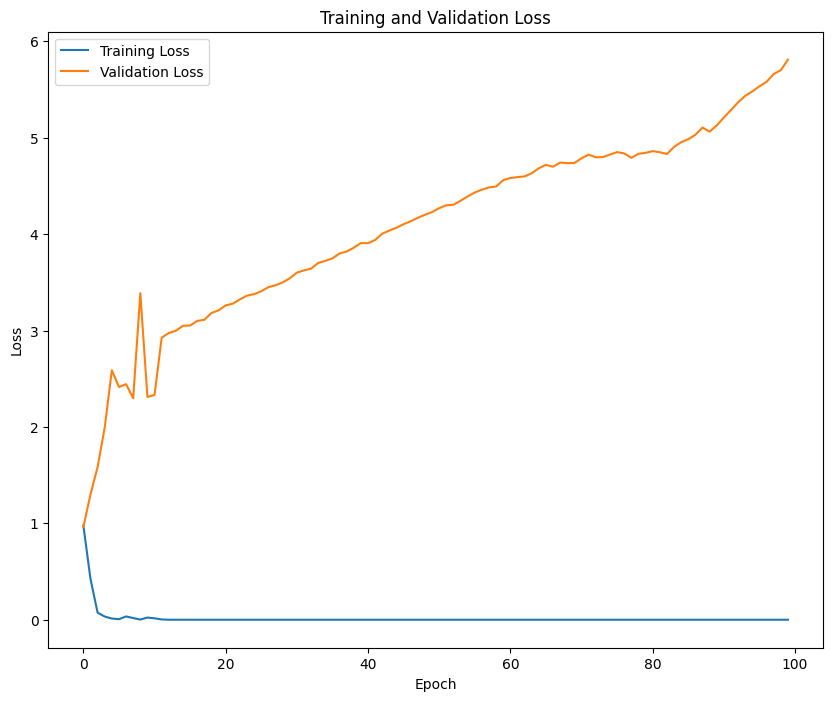

In [1]:

import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import wandb

# Initialize wandb
wandb.init(project="computer_vision", config={
    "learning_rate": 0.0005,
    "architecture": "CustomCNN",
    "dataset": "alzheimer_gabor_8",
    "epochs": 100,
    "batch_size": 16,
    "input_shape": (299, 299, 3),
    "num_classes": 4
})

config = wandb.config

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical')

# Define the CNN architecture
def create_custom_cnn(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

model = create_custom_cnn(config.input_shape, config.num_classes)
model.compile(optimizer=Adam(config.learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()  # Print model summary to understand its architecture

# Setup ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    'model_best_custom_cnn.h5',  # Path where the model will be saved
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max',  # Maximize the monitored metric (val_accuracy)
    verbose=1)  # Print out messages when saving models

# Training with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=config.epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[wandb.keras.WandbCallback(), checkpoint_callback]  # Add checkpoint callback
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
wandb.log({'test_loss': test_loss, 'test_accuracy': test_acc})

# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [1]:
#New

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint  # Import ModelCheckpoint
import matplotlib.pyplot as plt
import wandb

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Disabling GPU as specified

# Initialize wandb and config
wandb.init(
    project="computer_vision",
    config={
        "learning_rate": 0.001,
        "architecture": "CustomCNN",
        "dataset": "alzheimer_gabor_8",
        "epochs": 100,
        "batch_size": 32,
        "input_shape": (176, 208, 3),
        "num_classes": 4
    }
)

config = wandb.config

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define data generators for training and testing
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical')

# Create a custom CNN model
def create_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=predictions)
    return model

# Initialize CNN model
model = create_cnn_model(config.input_shape, config.num_classes)

# Compile the model
model.compile(optimizer=Adam(config.learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Log model summary to Wandb
wandb.log({'model_summary': model.summary()})

# Setup checkpoint directory
checkpoint_dir = './model_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_filepath = os.path.join(checkpoint_dir, 'checkpoint-{epoch:02d}-{val_accuracy:.2f}.h5')

# Create a model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=config.epochs,
    validation_data=test_generator,
    callbacks=[wandb.keras.WandbCallback(), checkpoint_callback]  # Add checkpoint callback here
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
wandb.log({'test_loss': test_loss, 'test_accuracy': test_acc})
print('Test accuracy:', test_acc)

# Save the model
model_filename = 'alzheimer_model_customcnn_{:.4f}.h5'.format(test_acc)
model.save(os.path.join('model', model_filename))
print(f"Model saved successfully as '{model_filename}'.")

# The rest of your plotting and evaluation code remains the same...



2024-05-05 00:09:05.119571: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 00:09:05.119611: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 00:09:05.119644: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-05 00:09:05.128990: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Currently logged in as: oskar

Found 5121 images belonging to 4 classes.
Found 1291 images belonging to 4 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 176, 208, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 176, 208, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 104, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 104, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 44, 52, 64)        0         
 g2D)                                                            
                                           

2024-05-05 00:09:10.787339: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100
161/161 [==============================] - ETA: 0s - loss: 1.0636 - accuracy: 0.4841

/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 1: val_accuracy improved from -inf to 0.49574, saving model to ./model_checkpoints/checkpoint-01-0.50.h5
161/161 [==============================] - 104s 639ms/step - loss: 1.0636 - accuracy: 0.4841 - val_loss: 1.0418 - val_accuracy: 0.4957
Epoch 2/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - ETA: 0s - loss: 1.0437 - accuracy: 0.4843INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 2: val_accuracy did not improve from 0.49574
161/161 [==============================] - 101s 626ms/step - loss: 1.0437 - accuracy: 0.4843 - val_loss: 1.0402 - val_accuracy: 0.4957
Epoch 3/100
161/161 [==============================] - ETA: 0s - loss: 1.0373 - accuracy: 0.4989

/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 3: val_accuracy did not improve from 0.49574
161/161 [==============================] - 101s 627ms/step - loss: 1.0373 - accuracy: 0.4989 - val_loss: 1.0306 - val_accuracy: 0.4957
Epoch 4/100
161/161 [==============================] - ETA: 0s - loss: 1.0319 - accuracy: 0.5005

/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 4: val_accuracy did not improve from 0.49574
161/161 [==============================] - 100s 624ms/step - loss: 1.0319 - accuracy: 0.5005 - val_loss: 1.0278 - val_accuracy: 0.4957
Epoch 5/100
161/161 [==============================] - ETA: 0s - loss: 1.0217 - accuracy: 0.5007
Epoch 5: val_accuracy did not improve from 0.49574
161/161 [==============================] - 100s 620ms/step - loss: 1.0217 - accuracy: 0.5007 - val_loss: 1.1044 - val_accuracy: 0.3517
Epoch 6/100
161/161 [==============================] - ETA: 0s - loss: 1.0296 - accuracy: 0.4913
Epoch 6: val_accuracy improved from 0.49574 to 0.51046, saving model to ./model_checkpoints/checkpoint-06-0.51.h5
161/161 [==============================] - 99s 616ms/step - loss: 1.0296 - accuracy: 0.4913 - val_loss: 1.0418 - val_accuracy: 0.5105
Epoch 7/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - ETA: 0s - loss: 0.9979 - accuracy: 0.5214INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 7: val_accuracy improved from 0.51046 to 0.51588, saving model to ./model_checkpoints/checkpoint-07-0.52.h5
161/161 [==============================] - 100s 622ms/step - loss: 0.9979 - accuracy: 0.5214 - val_loss: 1.0046 - val_accuracy: 0.5159
Epoch 8/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - ETA: 0s - loss: 0.9603 - accuracy: 0.5366INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 8: val_accuracy improved from 0.51588 to 0.55771, saving model to ./model_checkpoints/checkpoint-08-0.56.h5
161/161 [==============================] - 100s 624ms/step - loss: 0.9603 - accuracy: 0.5366 - val_loss: 0.9466 - val_accuracy: 0.5577
Epoch 9/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - ETA: 0s - loss: 0.9496 - accuracy: 0.5534INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 9: val_accuracy did not improve from 0.55771
161/161 [==============================] - 100s 623ms/step - loss: 0.9496 - accuracy: 0.5534 - val_loss: 0.9439 - val_accuracy: 0.5345
Epoch 10/100
161/161 [==============================] - ETA: 0s - loss: 0.9382 - accuracy: 0.5518
Epoch 10: val_accuracy did not improve from 0.55771
161/161 [==============================] - 100s 620ms/step - loss: 0.9382 - accuracy: 0.5518 - val_loss: 0.9559 - val_accuracy: 0.5352
Epoch 11/100
161/161 [==============================] - ETA: 0s - loss: 0.9189 - accuracy: 0.5628

/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 11: val_accuracy improved from 0.55771 to 0.56623, saving model to ./model_checkpoints/checkpoint-11-0.57.h5
161/161 [==============================] - 100s 622ms/step - loss: 0.9189 - accuracy: 0.5628 - val_loss: 0.9173 - val_accuracy: 0.5662
Epoch 12/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - ETA: 0s - loss: 0.9165 - accuracy: 0.5659
Epoch 12: val_accuracy improved from 0.56623 to 0.57242, saving model to ./model_checkpoints/checkpoint-12-0.57.h5
161/161 [==============================] - 99s 618ms/step - loss: 0.9165 - accuracy: 0.5659 - val_loss: 0.9278 - val_accuracy: 0.5724
Epoch 13/100
161/161 [==============================] - ETA: 0s - loss: 0.9142 - accuracy: 0.5636INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 13: val_accuracy did not improve from 0.57242
161/161 [==============================] - 100s 622ms/step - loss: 0.9142 - accuracy: 0.5636 - val_loss: 0.9074 - val_accuracy: 0.5686
Epoch 14/100
161/161 [==============================] - ETA: 0s - loss: 0.8949 - accuracy: 0.5694
Epoch 14: val_accuracy did not improve from 0.57242
161/161 [==============================] - 100s 619ms/step - loss: 0.8949 - accuracy: 0.5694 - val_loss: 0.9453 - val_accuracy: 0.5531
Epoch 15/100
161/161 [==============================] - ETA: 0s - loss: 0.9031 - accuracy: 0.5641
Epoch 15: val_accuracy improved from 0.57242 to 0.57552, saving model to ./model_checkpoints/checkpoint-15-0.58.h5
161/161 [==============================] - 99s 616ms/step - loss: 0.9031 - accuracy: 0.5641 - val_loss: 0.9398 - val_accuracy: 0.5755
Epoch 16/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - ETA: 0s - loss: 0.8681 - accuracy: 0.5903INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 16: val_accuracy did not improve from 0.57552
161/161 [==============================] - 99s 617ms/step - loss: 0.8681 - accuracy: 0.5903 - val_loss: 0.8908 - val_accuracy: 0.5740
Epoch 17/100
161/161 [==============================] - ETA: 0s - loss: 0.8475 - accuracy: 0.5991
Epoch 17: val_accuracy did not improve from 0.57552
161/161 [==============================] - 99s 615ms/step - loss: 0.8475 - accuracy: 0.5991 - val_loss: 0.9089 - val_accuracy: 0.5639
Epoch 18/100
161/161 [==============================] - ETA: 0s - loss: 0.8396 - accuracy: 0.6046
Epoch 18: val_accuracy improved from 0.57552 to 0.57707, saving model to ./model_checkpoints/checkpoint-18-0.58.h5
161/161 [==============================] - 99s 616ms/step - loss: 0.8396 - accuracy: 0.6046 - val_loss: 0.9441 - val_accuracy: 0.5771
Epoch 19/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - ETA: 0s - loss: 0.8362 - accuracy: 0.6069INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 19: val_accuracy improved from 0.57707 to 0.58947, saving model to ./model_checkpoints/checkpoint-19-0.59.h5
161/161 [==============================] - 100s 623ms/step - loss: 0.8362 - accuracy: 0.6069 - val_loss: 0.8714 - val_accuracy: 0.5895
Epoch 20/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - ETA: 0s - loss: 0.8354 - accuracy: 0.6106
Epoch 20: val_accuracy improved from 0.58947 to 0.59799, saving model to ./model_checkpoints/checkpoint-20-0.60.h5
161/161 [==============================] - 99s 617ms/step - loss: 0.8354 - accuracy: 0.6106 - val_loss: 0.8822 - val_accuracy: 0.5980
Epoch 21/100
161/161 [==============================] - ETA: 0s - loss: 0.8445 - accuracy: 0.6087
Epoch 21: val_accuracy did not improve from 0.59799
161/161 [==============================] - 99s 617ms/step - loss: 0.8445 - accuracy: 0.6087 - val_loss: 0.9010 - val_accuracy: 0.5763
Epoch 22/100
161/161 [==============================] - ETA: 0s - loss: 0.8175 - accuracy: 0.6243
Epoch 22: val_accuracy did not improve from 0.59799
161/161 [==============================] - 99s 613ms/step - loss: 0.8175 - accuracy: 0.6243 - val_loss: 0.8955 - val_accuracy: 0.5957
Epoch 23/100
161/161 [==============================] - ETA: 0s - loss: 0.8047 - accuracy: 0.6266I

INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 23: val_accuracy did not improve from 0.59799
161/161 [==============================] - 101s 628ms/step - loss: 0.8047 - accuracy: 0.6266 - val_loss: 0.8713 - val_accuracy: 0.5786
Epoch 24/100
161/161 [==============================] - ETA: 0s - loss: 0.7870 - accuracy: 0.6362

/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets


INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 24: val_accuracy improved from 0.59799 to 0.62045, saving model to ./model_checkpoints/checkpoint-24-0.62.h5
161/161 [==============================] - 101s 625ms/step - loss: 0.7870 - accuracy: 0.6362 - val_loss: 0.8623 - val_accuracy: 0.6204
Epoch 25/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - ETA: 0s - loss: 0.7846 - accuracy: 0.6366
Epoch 25: val_accuracy did not improve from 0.62045
161/161 [==============================] - 99s 615ms/step - loss: 0.7846 - accuracy: 0.6366 - val_loss: 0.9310 - val_accuracy: 0.5941
Epoch 26/100
161/161 [==============================] - ETA: 0s - loss: 0.7790 - accuracy: 0.6503
Epoch 26: val_accuracy did not improve from 0.62045
161/161 [==============================] - 99s 617ms/step - loss: 0.7790 - accuracy: 0.6503 - val_loss: 1.0674 - val_accuracy: 0.5778
Epoch 27/100
161/161 [==============================] - ETA: 0s - loss: 0.7567 - accuracy: 0.6548
Epoch 27: val_accuracy improved from 0.62045 to 0.62355, saving model to ./model_checkpoints/checkpoint-27-0.62.h5
161/161 [==============================] - 99s 618ms/step - loss: 0.7567 - accuracy: 0.6548 - val_loss: 0.8798 - val_accuracy: 0.6235
Epoch 28/100
161/161 [==============================] - ETA: 0s - loss: 0.7520 - accuracy: 0.6563I

INFO:tensorflow:Assets written to: /home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best/assets
wandb: Adding directory to artifact (/home/oskarem/CompVision/Project/wandb/run-20240505_000909-jqtbfrus/files/model-best)... Done. 0.0s



Epoch 28: val_accuracy did not improve from 0.62355
161/161 [==============================] - 100s 624ms/step - loss: 0.7520 - accuracy: 0.6563 - val_loss: 0.8561 - val_accuracy: 0.6135
Epoch 29/100
161/161 [==============================] - ETA: 0s - loss: 0.7459 - accuracy: 0.6544
Epoch 29: val_accuracy did not improve from 0.62355
161/161 [==============================] - 100s 620ms/step - loss: 0.7459 - accuracy: 0.6544 - val_loss: 0.8863 - val_accuracy: 0.6081
Epoch 30/100
161/161 [==============================] - ETA: 0s - loss: 0.7193 - accuracy: 0.6745
Epoch 30: val_accuracy did not improve from 0.62355
161/161 [==============================] - 99s 613ms/step - loss: 0.7193 - accuracy: 0.6745 - val_loss: 0.8625 - val_accuracy: 0.6166
Epoch 31/100
161/161 [==============================] - ETA: 0s - loss: 0.7166 - accuracy: 0.6700
Epoch 31: val_accuracy did not improve from 0.62355
161/161 [==============================] - 100s 619ms/step - loss: 0.7166 - accuracy: 0.6700 

/home/oskarem/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


161/161 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.6889
Epoch 34: val_accuracy did not improve from 0.62665
161/161 [==============================] - 99s 617ms/step - loss: 0.6856 - accuracy: 0.6889 - val_loss: 0.8640 - val_accuracy: 0.6166
Epoch 35/100
161/161 [==============================] - ETA: 0s - loss: 0.6712 - accuracy: 0.6987
Epoch 35: val_accuracy improved from 0.62665 to 0.62897, saving model to ./model_checkpoints/checkpoint-35-0.63.h5
161/161 [==============================] - 100s 621ms/step - loss: 0.6712 - accuracy: 0.6987 - val_loss: 0.9699 - val_accuracy: 0.6290
Epoch 36/100
161/161 [==============================] - ETA: 0s - loss: 0.6580 - accuracy: 0.7049
Epoch 36: val_accuracy did not improve from 0.62897
161/161 [==============================] - 100s 622ms/step - loss: 0.6580 - accuracy: 0.7049 - val_loss: 0.8968 - val_accuracy: 0.5933
Epoch 37/100
161/161 [==============================] - ETA: 0s - loss: 0.6767 - accuracy: 0.699

In [2]:
#New

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint  # Import ModelCheckpoint
import matplotlib.pyplot as plt
import wandb

#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Disabling GPU as specified

# Initialize wandb and config
wandb.init(
    project="computer_vision",
    config={
        "learning_rate": 0.0005,
        "architecture": "CustomCNN",
        "dataset": "alzheimer",
        "epochs": 100,
        "batch_size": 32,
        "input_shape": (176, 208, 3),
        "num_classes": 4
    }
)

config = wandb.config

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define data generators for training and testing
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical')

# Create a custom CNN model
def create_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=predictions)
    return model

# Initialize CNN model
model = create_cnn_model(config.input_shape, config.num_classes)

# Compile the model
model.compile(optimizer=Adam(config.learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Log model summary to Wandb
wandb.log({'model_summary': model.summary()})

# Setup checkpoint directory
checkpoint_dir = './model_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_filepath = os.path.join(checkpoint_dir, 'checkpoint-{epoch:02d}-{val_accuracy:.2f}.keras')

# Create a model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=config.epochs,
    validation_data=test_generator,
    callbacks=[ checkpoint_callback]  # Add checkpoint callback here
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
wandb.log({'test_loss': test_loss, 'test_accuracy': test_acc})
print('Test accuracy:', test_acc)

# Save the model
model_filename = 'alzheimer_model_customcnn_{:.4f}.h5'.format(test_acc)
model.save(os.path.join('model', model_filename))
print(f"Model saved successfully as '{model_filename}'.")





Found 5121 images belonging to 4 classes.
Found 1291 images belonging to 4 classes.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 176, 208, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 176, 208, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 88, 104, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 88, 104, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 44, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 44, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,300 (497.27 KB)

 Trainable params: 127,300 (497.27 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 176, 208, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 176, 208, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 88, 104, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 88, 104, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 44, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 44, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,300 (497.27 KB)

 Trainable params: 127,300 (497.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.4975 - loss: 1.0999
Epoch 1: val_accuracy improved from -inf to 0.49574, saving model to ./model_checkpoints/checkpoint-01-0.50.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 612ms/step - accuracy: 0.4975 - loss: 1.0996 - val_accuracy: 0.4957 - val_loss: 1.0434
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.4801 - loss: 1.0406
Epoch 2: val_accuracy did not improve from 0.49574
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 604ms/step - accuracy: 0.4802 - loss: 1.0406 - val_accuracy: 0.4957 - val_loss: 1.0471
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.4997 - loss: 1.0289
Epoch 3: val_accuracy did not improve from 0.49574
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 599ms/step - accuracy: 0.4997 - loss: 1.0290 - val_accuracy: 0.4957 - val_loss: 1.0357
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.4949 - loss: 1.0420
Epoch 4: val_accuracy did not improve from 0.49574
161/161 ━━━━━━━━━━━━━━━━━━━━

Test accuracy: 0.6700232625007629
Model saved successfully as 'alzheimer_model_customcnn_0.6700.h5'.


2024-05-07 11:29:03.294126: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Currently logged in as: oskar-amarkussen (ossyandlars). Use `wandb login --relogin` to force relogin


Found 5121 images belonging to 4 classes.
Found 1291 images belonging to 4 classes.


2024-05-07 11:29:10.574008: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31139 MB memory:  -> device: 0, name: Tesla V100-SXM3-32GB, pci bus id: 0000:59:00.0, compute capability: 7.0


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 176, 208, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 176, 208, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 88, 104, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 88, 104, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 44, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 44, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,300 (497.27 KB)

 Trainable params: 127,300 (497.27 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 176, 208, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 176, 208, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 88, 104, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 88, 104, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 44, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 44, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,300 (497.27 KB)

 Trainable params: 127,300 (497.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715081353.399731     788 service.cc:145] XLA service 0x7f9a84005350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715081353.399780     788 service.cc:153]   StreamExecutor device (0): Tesla V100-SXM3-32GB, Compute Capability 7.0
2024-05-07 11:29:13.493335: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-07 11:29:13.763776: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  3/161 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.3524 - loss: 1.1027 

I0000 00:00:1715081356.561441     788 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3643 - loss: 1.3587
Epoch 1: val_accuracy improved from -inf to 0.15957, saving model to ./model_checkpoints/checkpoint-01-0.16.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - accuracy: 0.3642 - loss: 1.3589 - val_accuracy: 0.1596 - val_loss: 1.3872
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1460 - loss: 1.3861
Epoch 2: val_accuracy did not improve from 0.15957
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.1460 - loss: 1.3861 - val_accuracy: 0.1433 - val_loss: 1.3872
Epoch 3/100
157/161 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1386 - loss: 1.4177
Epoch 3: val_accuracy did not improve from 0.15957
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.1388 - loss: 1.4167 - val_accuracy: 0.1433 - val_loss: 1.3874
Epoch 4/100
158/161 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2248 - loss: 1.3495
Epoch 4: val_accuracy improved from 0.15957 to 0.49574, saving model to ./model_checkpoin

Test accuracy: 0.6181254982948303
Model saved successfully as 'alzheimer_model_customcnn_0.6181.h5'.


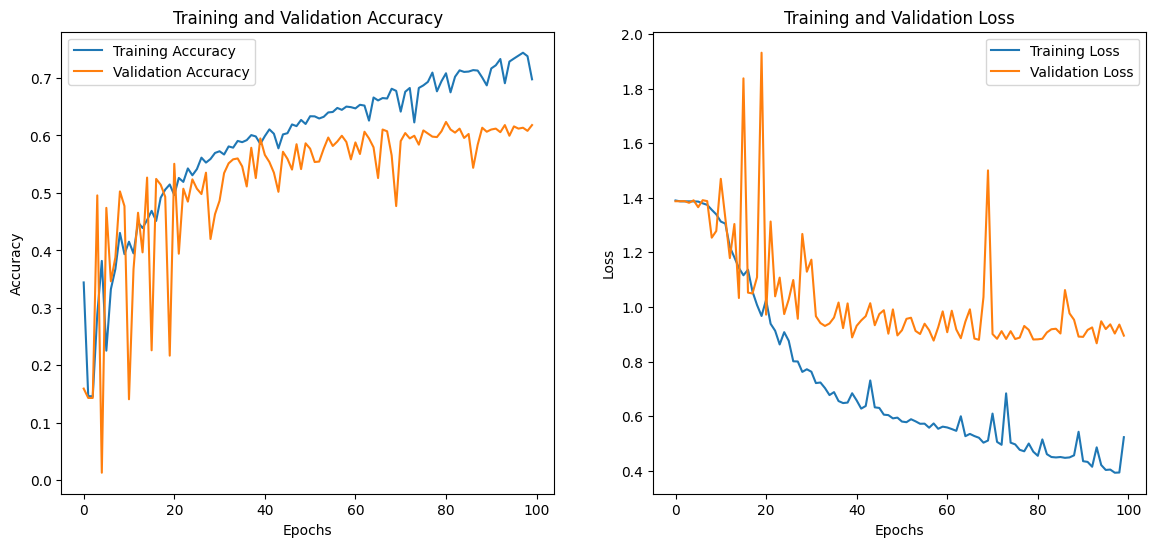

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


<Figure size 800x800 with 0 Axes>

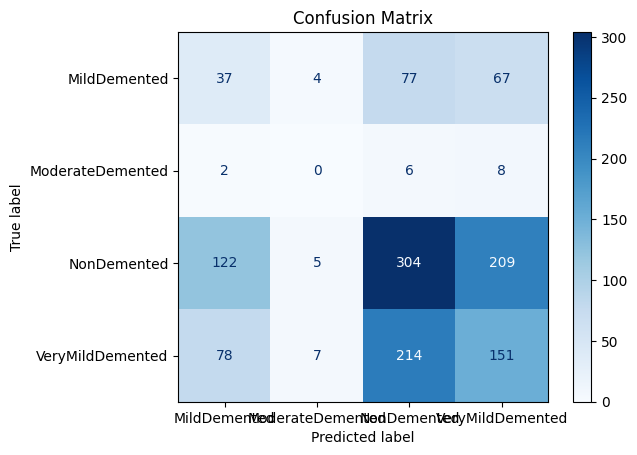

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Initialize wandb and config
wandb.init(
    project="computer_vision",
    config={
        "learning_rate": 0.0005,
        "architecture": "CustomCNN",
        "dataset": "alzheimer",
        "epochs": 100,
        "batch_size": 32,
        "input_shape": (176, 208, 3),
        "num_classes": 4
    }
)

config = wandb.config

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define data generators for training and testing
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical')

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = dict(enumerate(class_weights))

# Create a custom CNN model
def create_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=predictions)
    return model

# Initialize CNN model
model = create_cnn_model(config.input_shape, config.num_classes)

# Compile the model
model.compile(optimizer=Adam(config.learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Log model summary to Wandb
wandb.log({'model_summary': model.summary()})

# Setup checkpoint directory
checkpoint_dir = './model_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_filepath = os.path.join(checkpoint_dir, 'checkpoint-{epoch:02d}-{val_accuracy:.2f}.keras')

# Create a model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=config.epochs,
    validation_data=test_generator,
    class_weight=class_weight_dict,
    callbacks=[checkpoint_callback]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
wandb.log({'test_loss': test_loss, 'test_accuracy': test_acc})
print('Test accuracy:', test_acc)

# Save the model
model_filename = 'alzheimer_model_customcnn_{:.4f}.h5'.format(test_acc)
model.save(os.path.join('model', model_filename))
print(f"Model saved successfully as '{model_filename}'.")

# Plot training & validation accuracy and loss graphs
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Predict the labels on the test set
test_labels = test_generator.classes
test_preds = model.predict(test_generator)
test_preds_classes = np.argmax(test_preds, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


test_accuracy,▁
test_loss,▁
test_accuracy,0.61813
test_loss,0.89485


Found 5121 images belonging to 4 classes.
Found 1291 images belonging to 4 classes.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 176, 208, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 176, 208, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 88, 104, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 88, 104, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 44, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 44, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,300 (497.27 KB)

 Trainable params: 127,300 (497.27 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 176, 208, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 176, 208, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 88, 104, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 88, 104, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 44, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 44, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,300 (497.27 KB)

 Trainable params: 127,300 (497.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/home/oskarem/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


159/161 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4644 - loss: 1.1161
Epoch 1: val_accuracy improved from -inf to 0.49574, saving model to ./model_checkpoints/checkpoint-01-0.50.keras
161/161 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.4647 - loss: 1.1150 - val_accuracy: 0.4957 - val_loss: 1.0423
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5038 - loss: 1.0199
Epoch 2: val_accuracy did not improve from 0.49574
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5037 - loss: 1.0200 - val_accuracy: 0.4957 - val_loss: 1.0383
Epoch 3/100
160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4963 - loss: 1.0296
Epoch 3: val_accuracy did not improve from 0.49574
161/161 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.4962 - loss: 1.0297 - val_accuracy: 0.4957 - val_loss: 1.0331
Epoch 4/100
157/161 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5164 - loss: 0.9968
Epoch 4: val_accuracy improved from 0.49574 to 0.51820, saving model to ./model_checkpoin

Test accuracy: 0.6196746826171875
Model saved successfully as 'alzheimer_model_customcnn_0.6197.h5'.


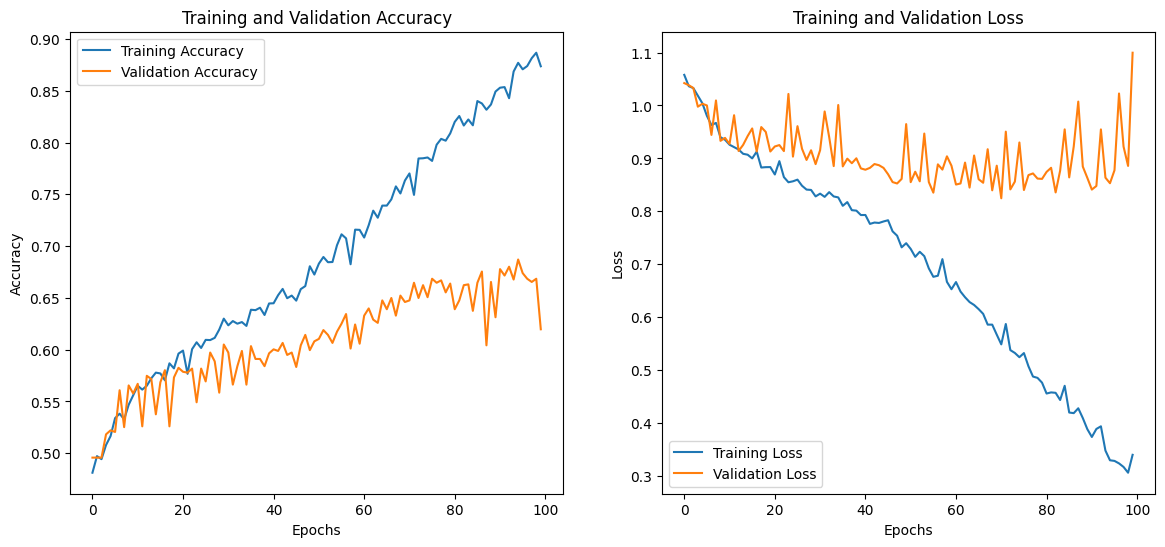

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


<Figure size 800x800 with 0 Axes>

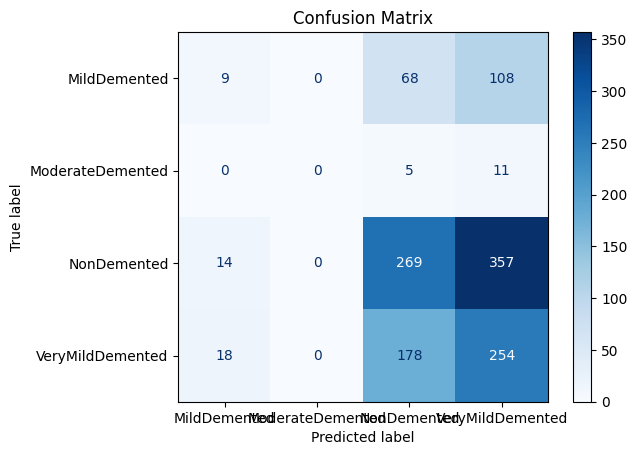

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import wandb

# Initialize wandb and config
wandb.init(
    project="computer_vision",
    config={
        "learning_rate": 0.0005,
        "architecture": "CustomCNN",
        "dataset": "alzheimer",
        "epochs": 100,
        "batch_size": 32,
        "input_shape": (176, 208, 3),
        "num_classes": 4
    }
)

config = wandb.config

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define data generators for training and testing
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=config.input_shape[:2],
    batch_size=config.batch_size,
    class_mode='categorical')

# Create a custom CNN model
def create_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=predictions)
    return model

# Initialize CNN model
model = create_cnn_model(config.input_shape, config.num_classes)

# Compile the model
model.compile(optimizer=Adam(config.learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Log model summary to Wandb
wandb.log({'model_summary': model.summary()})

# Setup checkpoint directory
checkpoint_dir = './model_checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_filepath = os.path.join(checkpoint_dir, 'checkpoint-{epoch:02d}-{val_accuracy:.2f}.keras')

# Create a model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=config.epochs,
    validation_data=test_generator,
    callbacks=[checkpoint_callback]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
wandb.log({'test_loss': test_loss, 'test_accuracy': test_acc})
print('Test accuracy:', test_acc)

# Save the model
model_filename = 'alzheimer_model_customcnn_{:.4f}.h5'.format(test_acc)
model.save(os.path.join('model', model_filename))
print(f"Model saved successfully as '{model_filename}'.")

# Plot training and validation accuracy and loss graphs
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Predict the labels on the test set
test_labels = test_generator.classes
test_preds = model.predict(test_generator)
test_preds_classes = np.argmax(test_preds, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, test_preds_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
